In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
col1 = df['sepal.length']

In [3]:
col2 = df.loc[:, 'sepal.length']

In [5]:
type(col1), type(col2)

(pandas.core.series.Series, pandas.core.series.Series)

In [6]:
col1.sum(), col1.mean()

(np.float64(876.5), np.float64(5.843333333333334))

In [7]:
col = ['sepal.length', 'sepal.width']
col3 = df[col]

In [8]:
col4 = df.loc[:,col]

In [9]:
type(col3), type(col4)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [11]:
col3.sum(),col3.mean()

(sepal.length    876.5
 sepal.width     458.6
 dtype: float64,
 sepal.length    5.843333
 sepal.width     3.057333
 dtype: float64)

In [12]:
col3.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4


In [13]:
list('12345')

['1', '2', '3', '4', '5']

In [ ]:
sum(list('12345')) # Str이므로 덧셈이 안됨

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
list(map(int,list('12345'))) # map으로 타입 바꾸기

[1, 2, 3, 4, 5]

In [16]:
sum(list(map(int,list('12345'))))

15

### GroupBy

In [ ]:
#select 'variety', mean('sepal.length'), mean('sepal.width'), mean('petal.length'), mean('petal.width')
#from iris
#group by 'variety'

In [17]:
df.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [ ]:
#select 'variety', mean('sepal.length'), mean('sepal.width')
#from iris
#group by 'variety'

In [ ]:
df.groupby('variety')[['sepal.length','sepal.width']].mean()

,sepal.length,sepal.width
variety,,
Setosa,5.006,3.428
Versicolor,5.936,2.770
Virginica,6.588,2.974


In [ ]:
#select 'variety', mean('sepal.length'), mean('sepal.width')
#from iris
#group by 'variety'
#having mean('sepal.length')>6

In [ ]:
# filter 함수는 그룹 단위로 조건을 평가한 뒤, 조건이 참(True)인 그룹의 원본 데이터를 그대로 반환
# 집계를 하는 것이 아니라 필터링이 주 목적
# --> 집계된 값에 조건을 걸어 집계된 결과를 보고 싶을 때 : agg() + 필터링
df.groupby('variety').filter(lambda x : x['sepal.length'].mean()>6) 

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [ ]:
#select 'variety', mean('sepal.length'), sum('sepal.width'), count('petal.length'), mean('petal.width')
#from iris
#group by 'variety'

In [ ]:
# 집계 : aggregation()
df_group = df.groupby('variety').aggregate(['mean','sum','count'])
df_group

sepal.length              sepal.width              petal.length  \
                   mean    sum count        mean    sum count         mean   
variety                                                                      
Setosa            5.006  250.3    50       3.428  171.4    50        1.462   
Versicolor        5.936  296.8    50       2.770  138.5    50        4.260   
Virginica         6.588  329.4    50       2.974  148.7    50        5.552   

                        petal.width               
              sum count        mean    sum count  
variety                                           
Setosa       73.1    50       0.246   12.3    50  
Versicolor  213.0    50       1.326   66.3    50  
Virginica   277.6    50       2.026  101.3    50

In [22]:
df_group.loc[:,('sepal.length', 'mean')]

variety
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: (sepal.length, mean), dtype: float64

In [ ]:
#select 'variety', mean('sepal.length'), sum('sepal.length'), count('sepal.length'), mean('sepal.length')
#from iris
#group by 'variety'

In [23]:
df.groupby('variety')['sepal.length'].aggregate(['mean','sum','count'])

,mean,sum,count
variety,,,
Setosa,5.006,250.3,50
Versicolor,5.936,296.8,50
Virginica,6.588,329.4,50


In [24]:
group_df = df.groupby('variety').mean()
group_df

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [25]:
def f(x):
    print(type(x))
    print(x)

df.groupby('variety').apply(f)

<class 'pandas.core.frame.DataFrame'>
    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1         

C:\Users\user\AppData\Local\Temp\ipykernel_8396\564304249.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('variety').apply(f)


""


In [26]:
def f(x):
    print(type(x))
    print(x)

df.groupby('variety').transform(f)

<class 'pandas.core.series.Series'>
0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal.length, dtype: float64
<class 'pandas.core.series.Series'>
0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    3.1
35    3.2
36    3.5
37    3.6
38    3.0
39 

,sepal.length,sepal.width,petal.length,petal.width
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
145,None,None,None,None
146,None,None,None,None
147,None,None,None,None
148,None,None,None,None


In [29]:
!pip install seaborn

In [31]:
# p.197~ 피벗 테이블
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#select sex, mean(survived)
#from titanic
#groupby sex

In [ ]:
# 성별별 생존률
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#select sex, mean(survived)
#from titanic
#groupby sex, class

In [40]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

C:\Users\user\AppData\Local\Temp\ipykernel_8396\60503751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [ ]:
# 성별과 좌석등급별 생존률
# unstack() : 용도!!!
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

C:\Users\user\AppData\Local\Temp\ipykernel_8396\4259562261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [41]:
titanic.loc[:,'sex'].unique()

array(['male', 'female'], dtype=object)

In [42]:
titanic.loc[:,'class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
# 피벗테이블 구문을 이용한 성별과 좌석등급별 생존률
# index=row 로 보기
titanic.pivot_table('survived', index='sex', columns='class')

C:\Users\user\AppData\Local\Temp\ipykernel_8396\4290070003.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [36]:
# 다단계 피벗 테이블
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

C:\Users\user\AppData\Local\Temp\ipykernel_8396\1029059086.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',['sex',age],'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [43]:
# p.202 피벗 테이블 예제
births =  pd.read_csv('./data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
# 연대별 남녀 출생률수
births['decade'] = 10*(births['year']//10) # col에 연도를 추가
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total birth per year')

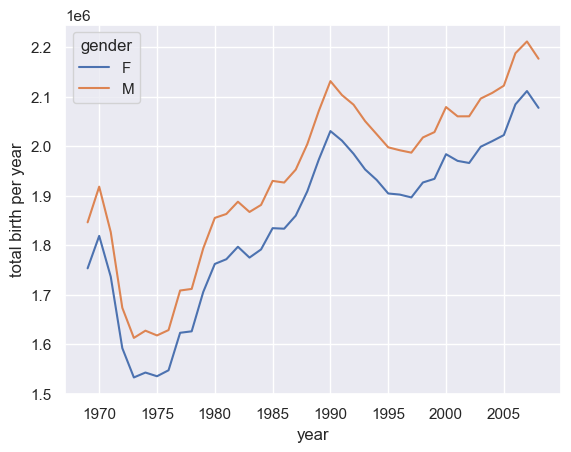

In [ ]:
# 연도별 남녀 출생률
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total birth per year')

In [74]:
births.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1969-01-01 to 1988-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14610 non-null  int64  
 1   month      14610 non-null  int64  
 2   day        14610 non-null  float64
 3   gender     14610 non-null  object 
 4   births     14610 non-null  int64  
 5   decade     14610 non-null  int64  
 6   dayofweek  14610 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 856.1+ KB


In [75]:
births.describe()

,year,month,day,births,decade,dayofweek
count,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089,1974.001369,3.000274
std,5.766538,3.448821,8.800393,579.996983,5.830799,1.999726
min,1969.000000,1.000000,1.000000,3249.000000,1960.000000,0.000000
25%,1974.000000,4.000000,8.000000,4383.000000,1970.000000,1.000000
50%,1979.000000,7.000000,16.000000,4812.000000,1970.000000,3.000000
75%,1984.000000,10.000000,23.000000,5259.000000,1980.000000,5.000000
max,1988.000000,12.000000,31.000000,6527.000000,1980.000000,6.000000


In [76]:
# mask를 통해 이상한 데이터를 제거
mask = (births['month']<=12 ) & (births['day']<=31)
new_df = births.loc[mask,:]

In [71]:
import datetime as dt
dt.datetime(2025,7,22)

datetime.datetime(2025, 7, 22, 0, 0)

In [72]:
10000*births.year+100*births.month+births.day

1969-01-01    19690101.0
1969-01-01    19690101.0
1969-01-02    19690102.0
1969-01-02    19690102.0
1969-01-03    19690103.0
                 ...    
1988-12-29    19881229.0
1988-12-30    19881230.0
1988-12-30    19881230.0
1988-12-31    19881231.0
1988-12-31    19881231.0
Length: 14610, dtype: float64

In [77]:
#년, 월, 일로부터 Date 인덱스 생성
births.index = pd.to_datetime(births[['year', 'month', 'day']])

In [ ]:
new_df['dayofweek'] = new_df.index.dayofweek

<Axes: xlabel='dayofweek'>

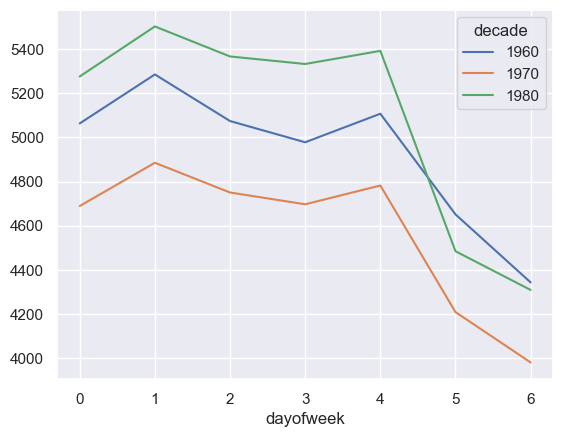

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mlp

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
# plt.gca().set_xticklabels(['M','T','W','T','F','S','S'])
# plt.ylabel('mean birth by day')

In [ ]:
# 월과 일별 출생수 -> 다중인덱스로 추출됨
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
# 년-월-일 날짜로 변환
# 1. 인덱스에서 month와 day 정보를 추출합니다.
# 인덱스 레벨에 이름이 없다면 get_level_values(0), get_level_values(1) 사용
months = births_by_date.index.get_level_values(0) 
days = births_by_date.index.get_level_values(1)

# 2. pd.to_datetime을 사용하여 한번에 DatetimeIndex를 생성합니다.
births_by_date.index = pd.to_datetime({
    'year': 2012,
    'month': months,
    'day': days
})

# 결과 확인
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<Axes: >

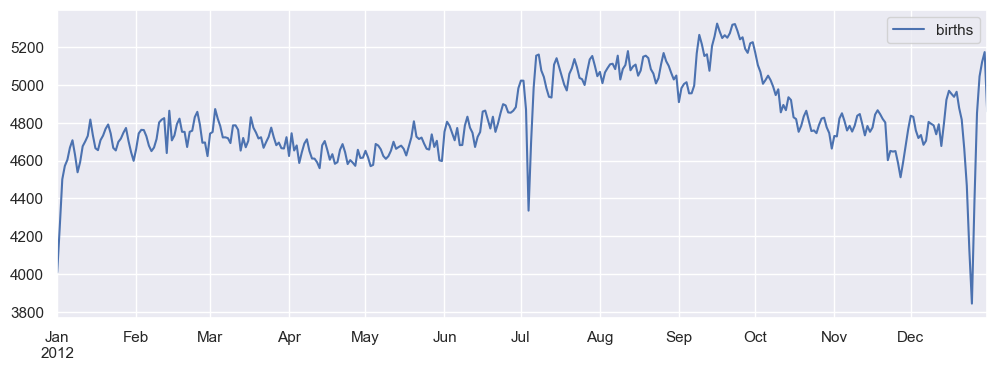

In [63]:
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax =ax)

In [78]:
# p.207
import numpy as np
x = np.array([2,3,5,7,11,13])
x*2

array([ 4,  6, 10, 14, 22, 26])

In [79]:
data = ['p','pa','M','g']
[s.capitalize() for s in data]

['P', 'Pa', 'M', 'G']

In [88]:
monte = pd.Series(['pa sd','aswpa','sda gM','Gf dg','dfgsp','pagfff','Mgds','gxzc'])

In [89]:
monte.str.lower()

0     pa sd
1     aswpa
2    sda gm
3     gf dg
4     dfgsp
5    pagfff
6      mgds
7      gxzc
dtype: object

In [90]:
monte.str.len()

0    5
1    5
2    6
3    5
4    5
5    6
6    4
7    4
dtype: int64

In [91]:
monte.str.startswith('g')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

In [92]:
monte.str.split()

0     [pa, sd]
1      [aswpa]
2    [sda, gM]
3     [Gf, dg]
4      [dfgsp]
5     [pagfff]
6       [Mgds]
7       [gxzc]
dtype: object

In [ ]:
#p.214 pandas 문자열 메서드 활용 예제
with open('./data/recipeitems.json') as f:
    line = f.readline()
pd.read_json(line).shape

C:\Users\user\AppData\Local\Temp\ipykernel_8396\880415099.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json(line).shape


(2, 12)

In [95]:
with open('./data/recipeitems.json' , 'r') as f:
    # 각 줄을 추출
    data = (line.strip() for line in f)
    # 각 줄이 리스트의 요소가 되도록 포맷을 재구성
    data_json = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_json)

recipes.shape

C:\Users\user\AppData\Local\Temp\ipykernel_8396\3502830841.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  recipes = pd.read_json(data_json)


(173278, 17)

In [ ]:
# 한 행만 보기
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [97]:
# ingredients 에 대한 정보보기
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [ ]:
# ingredients 가 가장 긴 조리법 찾기

In [ ]:
# description : 아침식사가 포함된 정보보기
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [100]:
# ingredients : 시나몬이 포함된 정보보기
recipes.ingredients.str.contains('[Cc]innamon').sum()

np.int64(10526)

In [ ]:
# 재료 목록이 주어졌을 때, 그 재료를 모두 사용하는 조리법을 찾아내는 시스템 고안하기
spice_list = ['salt','pepeer','oregano','sage','parsley','rosemary','thyme','cumin']
import re
spice_df = pd.DataFrame(dict((spice,recipes.ingredients.str.contains(spice, re.IGNORECASE))for spice in spice_list))
spice_df.head()

,salt,pepeer,oregano,sage,parsley,rosemary,thyme,cumin
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [105]:
selection = spice_df.query('oregano&sage&parsley&rosemary')
len(selection)

17

In [109]:
#mask 이용해서 필터링 해보기
mask = (spice_df['oregano'])&(spice_df['rosemary'])&(spice_df['parsley'])
idx = spice_df.loc[mask,:]

In [107]:
recipes.name[selection.index]

2319                                 Comfort Mac and Cheese
14003     Rib-Eye, T-Bone, and Strip Steaks Cut Over One...
80247                                           Ratatouille
84317     Baked aubergine stuffed with roast pumpkin, fe...
87197           Lamb Chops with Olive-and-Herb Crust Recipe
90502                                Baked Rosa Maria Fries
101729                              Dianne's Fish Seasoning
109883                              Italian Sausage Lasagna
110416                              Italian Mashed Potatoes
124448          Slow Cooker Rosemary and Red Pepper Chicken
131901                                World's Best Marinara
134036                       Hearty Lentil and Sausage Soup
134514                       Hearty Lentil and Sausage Soup
136120                                 Roast chicken recipe
137280                                  Cider-Brined Turkey
142515                                       Focaccia Bread
168108       Lamb Chops with an Olive-an

In [ ]:
#p.219 중요
import datetime as dt 
dt.datetime(2025,7,22)+dt.timedelta(100) # datetime.timedelta() : 두 날자의 차이를 계산할 때 쓰는 함수

datetime.datetime(2025, 10, 30, 0, 0)

In [128]:
df =  pd.read_csv('./data/births.csv')
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [130]:
new_df.loc[:,'day']=new_df.loc[:,'day'].astype('int')

In [ ]:
new_df['date'] = pd.to_datetime((new_df.year*10000+100*df.month+df.day))

0        19690101.0
1        19690101.0
2        19690102.0
3        19690102.0
4        19690103.0
            ...    
15542           NaN
15543           NaN
15544           NaN
15545           NaN
15546           NaN
Length: 15547, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_8396\2690680689.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dateT'] = pd.to_datetime(df['year']+'-'+df['month']+'-'+df['day'], errors='raise')


DateParseError: Unknown datetime string format, unable to parse: 1969-1-1.0, at position 0